<a href="https://colab.research.google.com/github/Ravitha/Image-Upsampling/blob/master/ddsm_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# add module to path so we can import it
import sys
sys.path.append('/content/breast_segment/breast_segment')
import breast_segment

In [4]:
!git clone https://github.com/olieidel/ljpeg3

Cloning into 'ljpeg3'...
remote: Enumerating objects: 73, done.
remote: Total 73 (delta 0), reused 0 (delta 0), pack-reused 73
Unpacking objects: 100% (73/73), done.


In [6]:
!git clone https://github.com/olieidel/breast_segment

Cloning into 'breast_segment'...
remote: Enumerating objects: 46, done.
remote: Total 46 (delta 0), reused 0 (delta 0), pack-reused 46
Unpacking objects: 100% (46/46), done.


In [5]:
!git clone https://github.com/olieidel/ddsmtools

Cloning into 'ddsmtools'...
remote: Enumerating objects: 61, done.
remote: Total 61 (delta 0), reused 0 (delta 0), pack-reused 61
Unpacking objects: 100% (61/61), done.


In [0]:
# We'll need some helper functions to open the
# weird ddsm images. Good news! I've already written them.
# You will have to put them on your python path, simply replace
# the path below with the location where these modules reside.

# get the modules from here:
# https://github.com/olieidel/ljpeg3
# https://github.com/olieidel/ddsmtools

# uncomment these lines and fill in the paths
#sys.path.append('PATH_TO_LJPEG3')
#sys.path.append('PATH_TO_DDSMTOOLS')

# Here, this is how I do it (you better comment these lines out)
sys.path.append('/content/ljpeg3/ljpeg3')
import ljpeg

In [0]:
# If you've done everything correctly, this should work
sys.path.append('/content/ddsmtools/ddsmtools')
import ics, overlay, visualize

In [27]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 2.7MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.9-cp36-cp36m-linux_x86_64.whl size=4265651 sha256=74b19ee24ba8ce5eca7787c0656be1d0b9a59b3780a1b24af2c6891bb1ba578e
  Stored in directory: /root/.cache/pip/wheels/02/e7/50/b67eee3b19c479cc5b41f10230bf9c1556be6eaaf095c6e997
Successfully built mahotas


In [0]:
# Let's download some mammographies!
# To save you some time, I wrote a simple ftp downloader
# for the DDSM database (http://marathon.csee.usf.edu/Mammography/Database.html)
# No need to understand this, just skip it

def ddsm_download(classification='normals', collection='normal_01', case='case0022'):
    from ftplib import FTP
    import os
    #file://figment.csee.usf.edu/pub/DDSM/sets/BCRP/BCRP_CALC_0/case1108
    ftp = FTP('figment.csee.usf.edu') 
    ftp.login('anonymous', '')
    ftp.cwd('/pub/DDSM/sets/{}/{}/{}/'.format(classification, collection, case))
    file_list = []
    ftp.retrlines('LIST', lambda x: file_list.append(x.split()))
    for info in file_list:
        ls_type, name = info[0], info[-1]
        if not ls_type.startswith('d'):
            file_dir = os.path.join(os.getcwd(), 'files', case, name)
            os.makedirs(os.path.dirname(file_dir), exist_ok=True)
            with open(file_dir, 'wb') as f:
                ftp.retrbinary('RETR {}'.format(name), f.write)
    ftp.close()

In [0]:
# start the download
ddsm_download('BCRP', 'BCRP_CALC_0', 'case1108')

In [78]:
# Now, we can open our freshly loaded files.
# Don't get distracted by some weird messages, it's "normal"
import os
im_file = 'A_1108_1.LEFT_CC.LJPEG'
#im_path = os.path.join(os.getcwd(), 'files', 'case1800', im_file)
im = ljpeg.read('/content/files/case1108/A_1108_1.LEFT_CC.LJPEG')

# let's also open the .ics file, just because we can
ics_file = ics.ics_file_name('/content/files/case1108/A_1108_1.LEFT_CC.LJPEG')
#ics_data = ics.parse_ics(os.path.join('files', 'case1800', )

found ics file
/content/files/case1108/A-1108-1.ics


In [0]:
!cd /content/ljpeg3/jpegdir/; make

In [0]:
# you will need matplotlib: pip3 install matplotlib
# sorry for the inconvenience
from matplotlib import pyplot as plt
%matplotlib inline

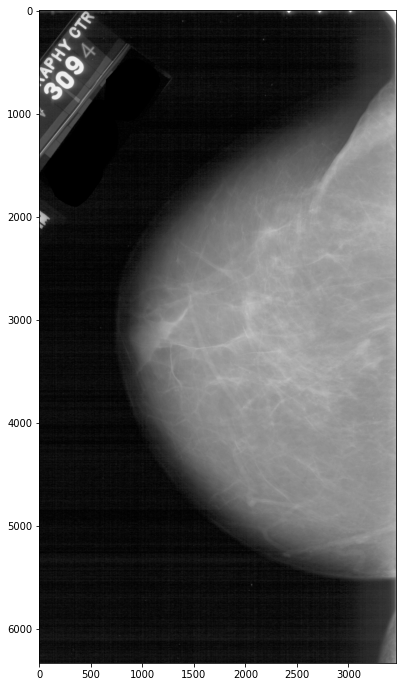

In [80]:
# let's take a look!
f, ax = plt.subplots(1, figsize=(12, 12)) # adjust the figure size
# set the correct window and color map.
# radiologists like gray, not understandably
ax.imshow(im, vmin=0, vmax=4096, cmap='gray')

In [0]:
x = overlay.parse_overlay('/content/files/case1108/A_1108_1.LEFT_CC.OVERLAY')

In [83]:
print(x)
print(type(x))

[{'ABNORMALITY': 1, 'ASSESSMENT': 4, 'SUBTLETY': 2, 'PATHOLOGY': 'MALIGNANT', 'OUTLINES': [{'NAME': 'BOUNDARY', 'START_COORDS': ('2566', '1965'), 'PATH': [6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4,

In [95]:
start_coords = []
for i in x[0]['OUTLINES'][0]['START_COORDS']:
  print(i)
  start_coords.append(int(i))

path = x[0]['OUTLINES'][0]['PATH']
a = overlay.path_to_coords(path,start_coords)

2566
1965


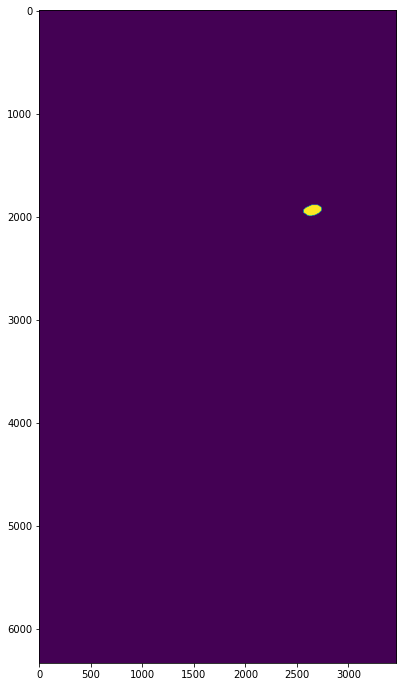

In [100]:
shape = im.shape

plt.figure(figsize=(12, 12))
plt.imshow(overlay.coords_to_fill_mask(a, shape))
plt.show()

(array([9627427., 1034735.,  282354.,  262327.,  394495.,  735979.,
        1010529.,  353107.,   38768.,  132279.]),
 array([ 738. , 1073.7, 1409.4, 1745.1, 2080.8, 2416.5, 2752.2, 3087.9,
        3423.6, 3759.3, 4095. ]),
 <a list of 10 Patch objects>)

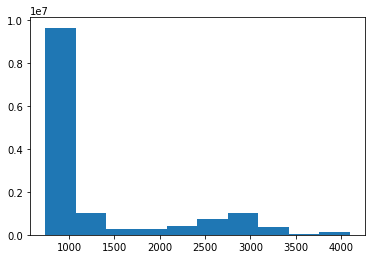

In [36]:
# let's just quickly check the histogram of the
# image values as some images in DDSM are really
# weird (this one looks okay)
plt.hist(im.ravel())

In [0]:
import numpy as np
from skimage.exposure import equalize_hist
from skimage.filters.rank import median
from skimage.measure import regionprops
from skimage.morphology import disk
from skimage.segmentation import felzenszwalb
from skimage.transform import rescale
from scipy.ndimage import binary_fill_holes
from skimage.transform import resize


def breast_segment(im, scale_factor=0.25, threshold=3900, felzenzwalb_scale=0.15):
    """
    Fully automated breast segmentation in mammographies.
    https://github.com/olieidel/breast_segment

    :param im: Image
    :param scale_factor: Scale Factor
    :param threshold: Threshold
    :param felzenzwalb_scale: Felzenzwalb Scale

    :return: (im_mask, bbox) where im_mask is the segmentation mask and
    bbox is the bounding box (rectangular) of the segmentation.

    """

    # set threshold to remove artifacts around edges
    im_thres = im.copy()
    im_thres[im_thres > threshold] = 0

    # determine breast side
    col_sums_split = np.array_split(np.sum(im_thres, axis=0), 2)
    left_col_sum = np.sum(col_sums_split[0])
    right_col_sum = np.sum(col_sums_split[1])

    if left_col_sum > right_col_sum:
        breast_side = 'l'
    else:
        breast_side = 'r'

    # rescale and filter aggressively, normalize
    im_small = rescale(im_thres, scale_factor)
    im_small_filt = median(im_small, disk(50))
    # this might not be helping, actually sometimes it is
    im_small_filt = equalize_hist(im_small_filt)

    # run mr. felzenzwalb
    segments = felzenszwalb(im_small_filt, scale=felzenzwalb_scale)
    segments += 1  # otherwise, labels() would ignore segment with segment=0


    props = regionprops(segments)

    # Sort Props by area, descending
    props_sorted = sorted(props, key=lambda x: x.area, reverse=True)

    expected_bg_index = 0
    bg_index = expected_bg_index

    bg_region = props_sorted[bg_index]
    minr, minc, maxr, maxc = bg_region.bbox
    filled_mask = bg_region.filled_image

    im_small_fill = np.zeros((im_small_filt.shape[0]+2, im_small_filt.shape[1]+1), dtype=int)

    if breast_side == 'l':
        # breast expected to be on left side,
        # pad on right and bottom side
        im_small_fill[minr+1:maxr+1, minc:maxc] = filled_mask
        im_small_fill[0, :] = 1  # top
        im_small_fill[-1, :] = 1  # bottom
        im_small_fill[:, -1] = 1  # right
    elif breast_side == 'r':
        # breast expected to be on right side,
        # pad on left and bottom side
        im_small_fill[minr+1:maxr+1, minc+1:maxc+1] = filled_mask  # shift mask to right side
        im_small_fill[0, :] = 1  # top
        im_small_fill[-1, :] = 1  # bottom
        im_small_fill[:, 0] = 1  # left

    im_small_fill = binary_fill_holes(im_small_fill)

    im_small_mask = im_small_fill[1:-1, :-1] if breast_side == 'l' \
                  else im_small_fill[1:-1, 1:]

    # rescale mask
    im_mask = resize(im_small_mask, im.shape).astype(bool)

    # invert!
    im_mask = ~im_mask

    # determine side of breast in mask and compare
    col_sums_split = np.array_split(np.sum(im_mask, axis=0), 2)
    left_col_sum = np.sum(col_sums_split[0])
    right_col_sum = np.sum(col_sums_split[1])

    if left_col_sum > right_col_sum:
        breast_side_mask = 'l'
    else:
        breast_side_mask = 'r'

    if breast_side_mask != breast_side:
        # breast mask is not on expected side
        # we might have segmented bg instead of breast
        # so invert again
        print('breast and mask side mismatch. inverting!')
        im_mask = ~im_mask

    # exclude thresholded area (artifacts) in mask, too
    im_mask[im > threshold] = False

    # fill holes again, just in case there was a high-intensity region
    # in the breast
    im_mask = binary_fill_holes(im_mask)

    # if no region found, abort early and return mask of complete image
    if im_mask.ravel().sum() == 0:
        all_mask = np.ones_like(im).astype(bool)
        bbox = (0, 0, im.shape[0], im.shape[1])
        print('Couldn\'t find any segment')
        return all_mask, bbox

    # get bbox
    minr = np.argwhere(im_mask.any(axis=1)).ravel()[0]
    maxr = np.argwhere(im_mask.any(axis=1)).ravel()[-1]
    minc = np.argwhere(im_mask.any(axis=0)).ravel()[0]
    maxc = np.argwhere(im_mask.any(axis=0)).ravel()[-1]

    bbox = (minr, minc, maxr, maxc)

    return im_mask, bbox


In [69]:
# finally! let's do some segmentation!
mask, bbox = breast_segment(im, scale_factor=0.10, threshold=3700)

/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


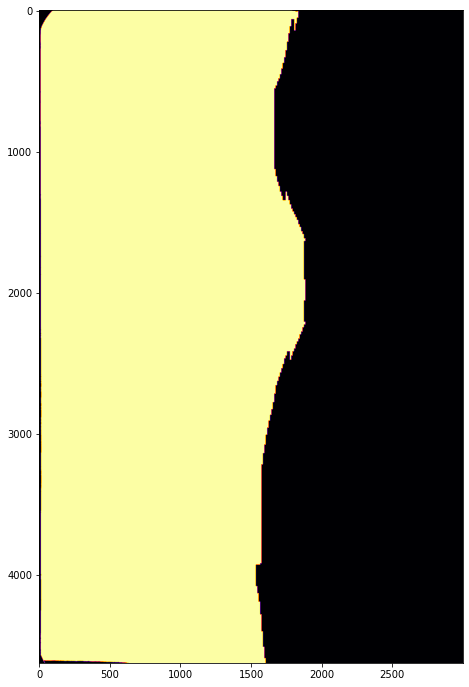

In [70]:
# let's check..
# wow! it worked!
# confession: it doesn't always work that well
f, ax = plt.subplots(1, figsize=(12, 12)) # adjust the figure size
# set the correct window and color map.
# radiologists like gray, not understandably
ax.imshow(mask, vmin=0, vmax=1, cmap='inferno') # use inferno colormap for dramatisation

In [71]:
# for further processing, the bbox variable gives
# us coordinates of a rectangular bounding box of the segmentation
# in the format:
# (minimum_row, minimum_column, maximum_row, maximum_column)
bbox

(0, 11, 4623, 1884)

In [0]:
# we're actually done, but just for some fun, let's
# have a look how we can better visualize this

# prepare the bbox for visalization
def bbox_lines(im, bbox):
    # destructure the bbox as into columns and rows, see above
    minr, minc, maxr, maxc = bbox
    line_left = mlines.Line2D([minc, minc], [0, im.shape[0]], color='r', lw=5, alpha=.5)
    line_right = mlines.Line2D([maxc, maxc], [0, im.shape[0]], color='r', lw=5, alpha=.5)
    line_top = mlines.Line2D([0, im.shape[1]], [minr, minr], color='r', lw=5, alpha=.5)
    line_bot = mlines.Line2D([0, im.shape[1]], [maxr, maxr], color='r', lw=5, alpha=.5)
    
    return line_left, line_right, line_top, line_bot

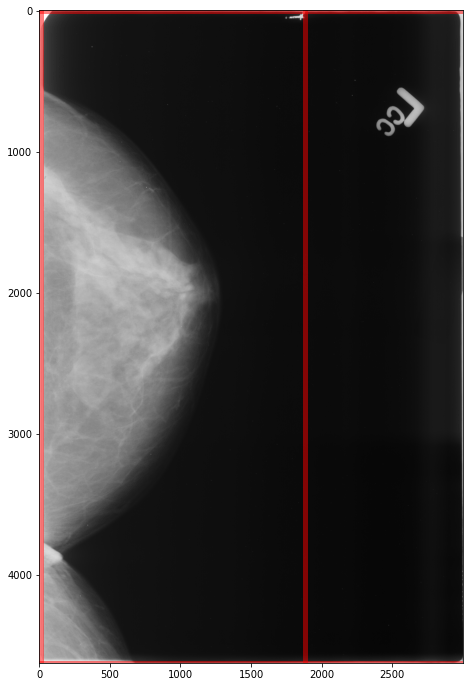

In [73]:
# let's plot it! .. in yellow

import matplotlib.lines as mlines

f = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
ax.imshow(im, cmap='gray')
lines = bbox_lines(im, bbox)
[ax.add_line(l) for l in lines]

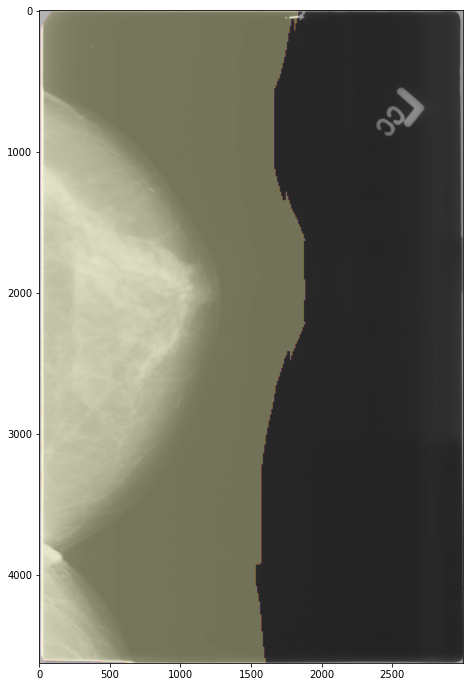

In [74]:
# one last thing: how about an overlay?
f = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
ax.imshow(im, vmin=0, vmax=4096, cmap='gray')
ax.imshow(mask, alpha=.3, cmap='inferno') # alpha controls the transparency